california house linear regression 


Housing has been a topic of concern for all Californians due to the rising prices. It leads to the question: why are homes in California so expensive?

The California Housing Dataset, seen below, uses information from the 1990 census. We may be able to use the data to develop insight into how housing value is distributed throughout California.

The data set contains 10 features of 20,640 observations. Each observation is a single block within California. All of the features are quantitative aside from ocean_proximity, which is an integer class of five options: <1 OCEAN (less than a one hour drive to the ocean), INLAND, ISLAND, NEAR BAY, and NEAR OCEAN. longitude and latitude denote how far west and north the block is respectively. housing_median_age, median_income, and median_house_value are the median ages (years), incomes (10,000 USD), and housing price estimates (USD) for each block. total_rooms, total_bedrooms, population, and households reflect the total number of rooms, bedrooms, people, and housing units in each block.

install pyspark


In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark  

Many of the Machine Learning Crash Course Programming Exercises use the California housing data set, which contains data drawn from the 1990 U.S. Census. The following table provides descriptions, data ranges, and data types for each feature in the data set.
longitude:A measure of how far west a house is; a more negative value is farther west
latitude:A measure of how far north a house is; a higher value is farther north
housingMedianAge:Median age of a house within a block; a lower number is a newer building
totalRooms:Total number of rooms within a block	
totalBedrooms:Total number of bedrooms within a block	
population:Total number of people residing within a block	
households:	Total number of households, a group of people residing within a home unit, for a block
medianIncome:Median income for households within a block of houses (measured in tens of thousands of US Dollars)
medianHouseValue:	Median house value for households within a block (measured in US Dollars)

In [ ]:
df = spark.read.csv('/content/housing.csv', header=True,inferSchema=True,sep=',')
df.show(10)
df.count()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY|
|  -122.25|   37.85|              52.0|     1274.0|         235.0|     558.0|     219.0|       5.6431|          341300.0|       NEAR BAY|
|  -122.25|   37.85|              

20640

In [ ]:
df = df.na.drop()
df.count()

20433

The plot blow shows the dependency of housing price with distance to the ocean.

Here, we add a column to the dataset which is more correlated to the median_house_value and quantify the 'ocean_proximity'. Finally clean the data by dropping the rows which have missing values.

The 1st plot blow shows in 1970s There was a maximum demand of living luxury and large living areas by the most wealthy families in housing market of California which over time, it shows a significant decrease.
The 2nd plot shows  the average of room/houshold architecter is rising over time and a sharp increase in 1990s when the dataset is collected.The 3rd plot show there was maximum of apartment construction and demand in housing market of California during  1970s and 1950s.

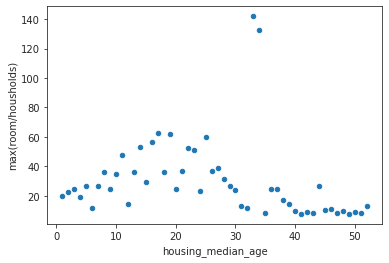

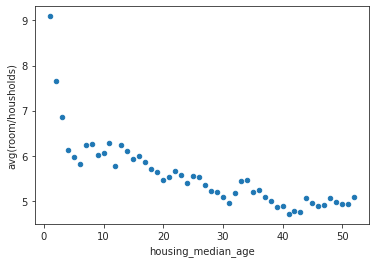

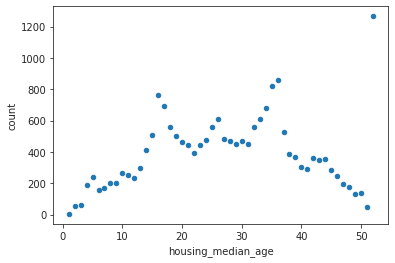

In [ ]:
df=df.withColumn('room/housholds',df['total_rooms']/df['households'])

dy0=df.groupBy('housing_median_age').max('room/housholds')
dy0.toPandas().plot.scatter('housing_median_age','max(room/housholds)')

dy1=df.groupBy('housing_median_age').mean()
dy1.toPandas().plot.scatter('housing_median_age','avg(room/housholds)')

dy2=df.groupBy('housing_median_age').count()
dy2.toPandas().plot.scatter('housing_median_age','count')




Transformer converts categorial objects to numerical:

In [ ]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='ocean_proximity',outputCol='prox_indexed')
df=indexer.fit(df).transform(df)    
df.show()


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|    room/housholds|prox_indexed|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY| 6.984126984126984|         3.0|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY| 6.238137082601054|         3.0|
|  -122.24|   37.85|              52.0|     1467.0|         190.0|     496.0|     177.0|       7.2574|          352100.0|       NEAR BAY| 8.2881355932

In [ ]:
df.describe().show()

+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+------------------+------------------+
|summary|          longitude|          latitude|housing_median_age|       total_rooms|    total_bedrooms|        population|        households|     median_income|median_house_value|ocean_proximity|    room/housholds|      prox_indexed|
+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---------------+------------------+------------------+
|  count|              20433|             20433|             20433|             20433|             20433|             20433|             20433|             20433|             20433|          20433|             20433|             20433|
|   mean|-119.57068859198068| 35.63322125972706|28.63309

In [ ]:
print(df.columns)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity', 'room/housholds', 'prox_indexed']


vector assembler

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
required_features=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'prox_indexed']
featureassembler= VectorAssembler(inputCols=required_features,outputCol='independentfeatures')
df=featureassembler.transform(df)



In [ ]:
print(df.printSchema)

<bound method DataFrame.printSchema of DataFrame[longitude: double, latitude: double, housing_median_age: double, total_rooms: double, total_bedrooms: double, population: double, households: double, median_income: double, median_house_value: double, ocean_proximity: string, room/housholds: double, prox_indexed: double, independentfeatures: vector]>


In [ ]:
df.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|    room/housholds|prox_indexed| independentfeatures|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY| 6.984126984126984|         3.0|[-122.23,37.88,41...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY| 6.238137082601054|         3.0|[-122.22,37.86,21...|
|  -122.24|   37.85|              52.0|     1

fitting and transforming

In [ ]:
from pyspark.ml.feature import StandardScaler
scaler= StandardScaler(inputCol='independentfeatures', outputCol='scaledfeatures',withStd=True,withMean=False)
scalerModel=scaler.fit(df)
cluster_final_data=scalerModel.transform(df)

In [ ]:
cluster_final_data.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|    room/housholds|prox_indexed| independentfeatures|      scaledfeatures|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY| 6.984126984126984|         3.0|[-122.23,37.88,41...|[-61.005863841998...|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY| 6.238137082601

Regression Task:

In [ ]:
from pyspark.ml.regression import LinearRegression
train_data,test_data=cluster_final_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='scaledfeatures',labelCol='median_house_value')
regressor=regressor.fit(train_data)

In [ ]:
print(regressor.coefficients)
print(regressor.intercept)

[1.6275117405374048e-06,1.4249433629925205e-06,7.11972208665228e-08,-1.8435765476446307e-07,-4.534723771030153e-07,1.0134484871955129e-07,5.369372321389001e-07,-6.014171880018163e-08,115435.66709891579,1.4937996846004995e-07]
7.256342588719154e-05


evalute data test

In [ ]:
pred_result=regressor.evaluate(test_data)

predict 

In [ ]:
pred_result.predictions.show()

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+--------------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|    room/housholds|prox_indexed| independentfeatures|      scaledfeatures|        prediction|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+------------------+------------+--------------------+--------------------+------------------+
|   -124.3|   41.84|              17.0|     2677.0|         531.0|    1244.0|     456.0|       3.0313|          103600.0|     NEAR OCEAN| 5.870614035087719|         2.0|[-124.3,41.84,17....|[-62.039015589956...|103600.00000005192|
|  -124.26|   40.58|              52.0|     2217.0|         394.0|     907.0

Performance Metrics:

In [ ]:
pred_result.r2,pred_result.meanAbsoluteError

(1.0, 3.839640142618163e-07)